<a href="https://colab.research.google.com/github/mkirby1995/DS-Unit-2-Sprint-2-Regression/blob/master/Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

##0.0 Import and Clean Data 

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np 
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
rcParams['figure.figsize'] = 19, 10

In [0]:
Ames = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

df = pd.read_csv(Ames)



---



## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

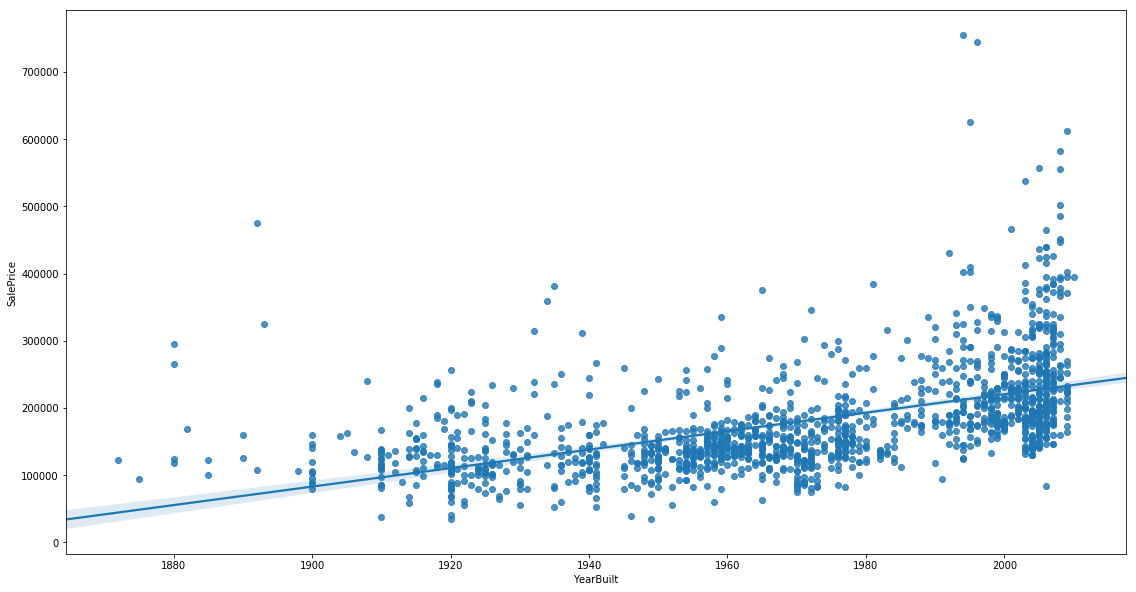

In [3]:
sns.regplot('YearBuilt','SalePrice',data = df);

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

###Engineer Neighborhood and House Scores

**Neighborhood Score**

In [0]:
mean_price_nei = pd.pivot_table(data = df, values='SalePrice', index='Neighborhood', columns=None, aggfunc='median')

sorted_means = mean_price_nei.sort_values(by='SalePrice', ascending=False)

neighborhood_names = []
neighborhood_scores =[]

for _ in range(len(sorted_means)):
  #print(sorted_means.index[_], sorted_means['SalePrice'][_])
  neighborhood_names.append(sorted_means.index[_])
  
for _ in range(len(neighborhood_names)):
  neighborhood_scores.append(25 - _)
  
neighborhoodz = dict(zip(neighborhood_names, neighborhood_scores))

df['neighborhood_score'] = df['Neighborhood'].replace(neighborhoodz)

House Score

In [0]:
df['ExterQual'] = df['ExterQual'].replace({'Ex':5, 'Gd':4, 'TA':3,
                                           'Fa':2, 'Po':1})

df['ExterCond'] = df['ExterCond'].replace({'Ex':5, 'Gd':4, 'TA':3,
                                           'Fa':2, 'Po':1})

df['HeatingQC'] = df['HeatingQC'].replace({'Ex':5, 'Gd':4, 'TA':3,
                                           'Fa':2, 'Po':1})

df['KitchenQual'] = df['KitchenQual'].replace({'Ex':5, 'Gd':4, 'TA':3,
                                               'Fa':2, 'Po':1})

df['KitchenQual'] = df['KitchenQual'].astype('int64')

df['GarageQual'] = df['GarageQual'].replace({'Ex':5, 'Gd':4, 'TA':3,
                                             'Fa':2, 'Po':1, 'NA': 0,})

df['GarageQual'] = df['GarageQual'].fillna(0)

df['GarageQual'] = df['GarageQual'].astype('int64')

df['GarageCond'] = df['GarageCond'].replace({'Ex':5, 'Gd':4, 'TA':3,
                                             'Fa':2, 'Po':1, 'NA': 0})

df['GarageCond'] = df['GarageCond'].fillna(0)

df['GarageCond'] = df['GarageCond'].astype('int64')

df['BsmtCond'] = df['BsmtCond'].replace({'Ex':5, 'Gd':4, 'TA':3,
                                         'Fa':2, 'Po':1, 'NA': 0})

df['BsmtCond'] = df['BsmtCond'].fillna(0)

Prop_cols = [df['OverallQual'], df['OverallCond'], df['ExterQual'],
             df['ExterCond'], df['KitchenQual'], df['HeatingQC'],
             df['GarageQual'], df['GarageCond'], df['BsmtCond']]

df['property_score'] = sum(Prop_cols)

df['property_score'] = df['property_score'].astype('int64')



---



###Statsmodel

In [0]:
# Prepare X and y
target = 'SalePrice'
features = ['neighborhood_score', 'property_score']

X = df[features] 
y = df[target]

In [7]:
# Use Statsmodels to run a regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     1123.
Date:                Wed, 01 May 2019   Prob (F-statistic):          7.63e-296
Time:                        20:02:56   Log-Likelihood:                -17863.
No. Observations:                1460   AIC:                         3.573e+04
Df Residuals:                    1457   BIC:                         3.575e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.748e+05   1.21

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)




---



## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

Neighborhood Score

- Standard Error
  - 237.016

- P-Value
  - 0.00

Property Score

- Standard Error
  - 391.971

- P-Value
  - 0.00

In [0]:
##### Your Code Here #####

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [0]:
def remove_outliers(col_name, std_threshold):
  """
  Given a column name (df['column_name']) and a standard deviation threshold
  multiplier (int or float) this function will return a new column with
  outliers replaced by the column mean
  """
  
  std = col_name.std()
  thresh = std_threshold
  mean = col_name.mean()
  values = []

  for _ in range(len(col_name)):
    value = col_name[_]
  
    if value > (mean + std*thresh):
      value = mean
    
    elif value < (mean - std*thresh):
      value = mean
    
    values.append(value)
    
  new_col = pd.Series(values)
  
  return new_col
  

In [0]:
df['neighborhood_score']  = remove_outliers(df['neighborhood_score'], 1.75)
df['property_score']  = remove_outliers(df['property_score'], 1.75)

In [0]:
# Prepare X and y
target = 'SalePrice'
features = ['neighborhood_score', 'property_score']

X = df[features] 
y = df[target]

In [12]:
# Use Statsmodels to run a regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     679.1
Date:                Wed, 01 May 2019   Prob (F-statistic):          4.18e-209
Time:                        20:02:56   Log-Likelihood:                -18063.
No. Observations:                1460   AIC:                         3.613e+04
Df Residuals:                    1457   BIC:                         3.615e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -3.05e+05   1.94

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [0]:
df['ln_price'] = np.log(df['SalePrice'])

In [0]:
# Prepare X and y
target = 'ln_price'
features = ['neighborhood_score', 'property_score']

X = df[features] 
y = df[target]

In [15]:
# Use Statsmodels to run a regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     899.4
Date:                Wed, 01 May 2019   Prob (F-statistic):          3.98e-255
Time:                        20:02:56   Log-Likelihood:                -144.38
No. Observations:                1460   AIC:                             294.8
Df Residuals:                    1457   BIC:                             310.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.5811      0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [16]:
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                 167.746140
neighborhood_score      1.304965
property_score          1.304965
dtype: float64

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

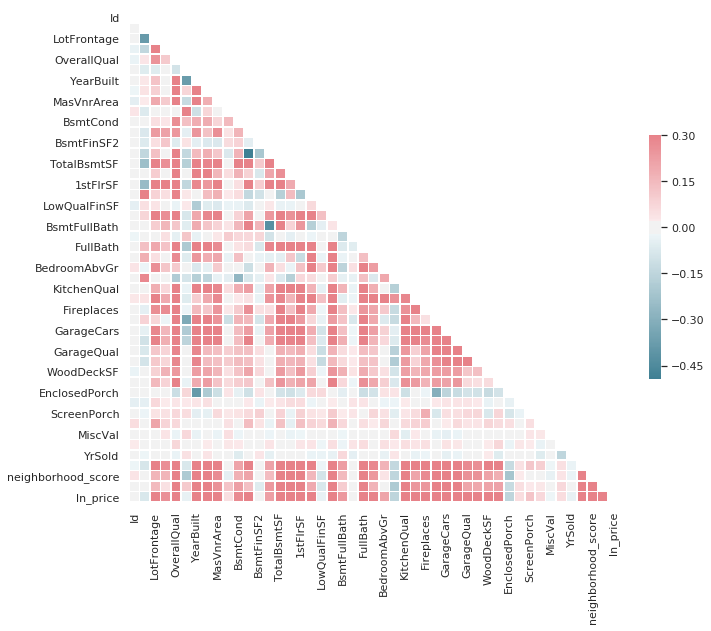

In [17]:
from string import ascii_letters

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
##### Your Code Here #####

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [19]:
model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     942.7
Date:                Wed, 01 May 2019   Prob (F-statistic):          2.00e-263
Time:                        20:02:57   Log-Likelihood:                -144.38
No. Observations:                1460   AIC:                             294.8
Df Residuals:                    1457   BIC:                             310.6
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.5811      0

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

In [0]:
non_obj = []
for _ in range(len(df.dtypes)):
  if df.dtypes[_] != object:
    #print(df.dtypes.index[_], df.dtypes[_])
    non_obj.append(df.dtypes.index[_])

In [21]:
feature_list = df[non_obj]
feature_list = feature_list.drop(columns = ['Id', 'SalePrice', 'ln_price', 'MoSold'])
feature_list.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterCond', 'BsmtCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'YrSold', 'neighborhood_score', 'property_score'],
      dtype='object')

In [0]:
features = feature_list.columns.tolist()

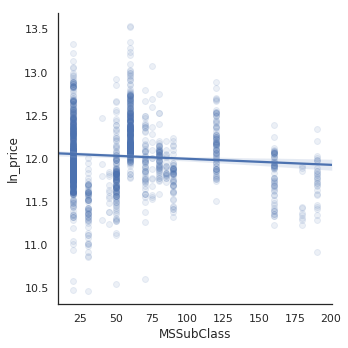

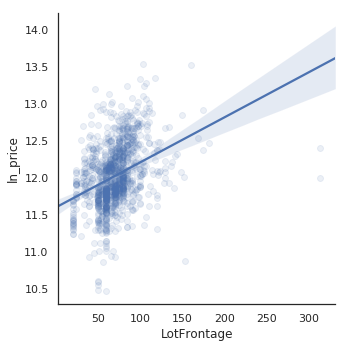

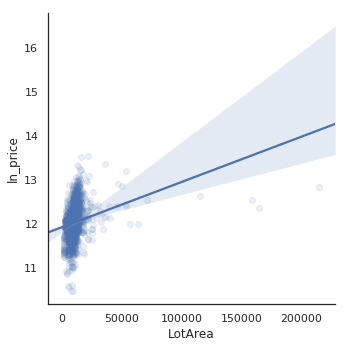

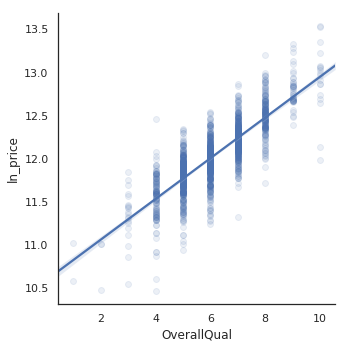

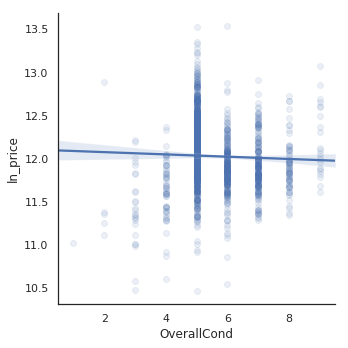

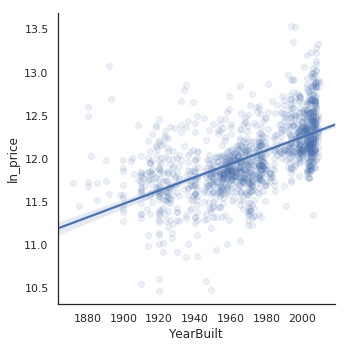

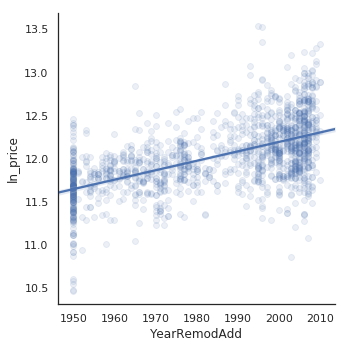

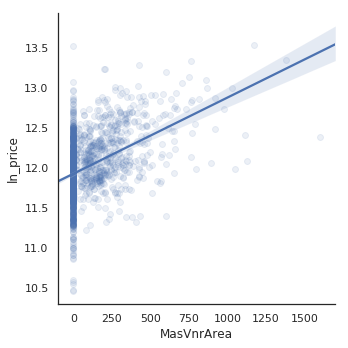

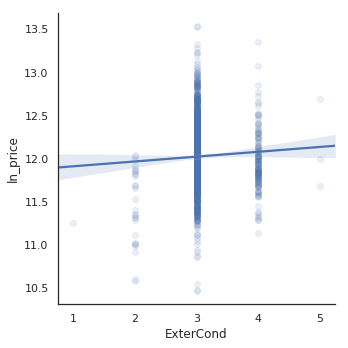

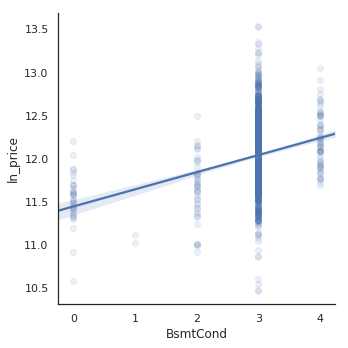

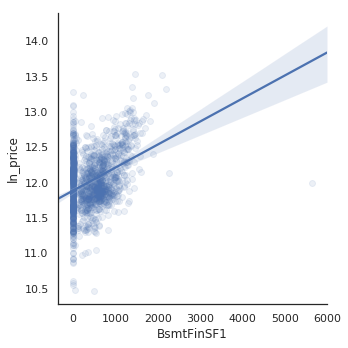

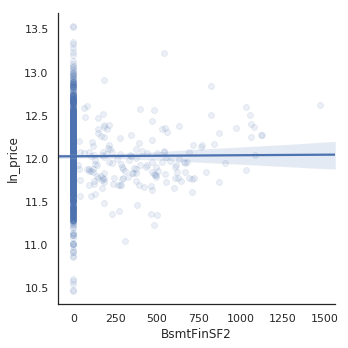

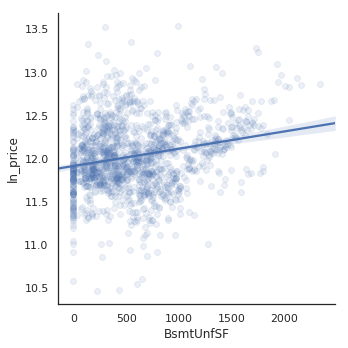

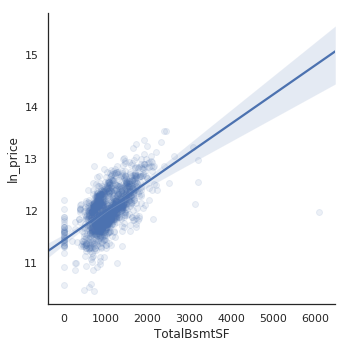

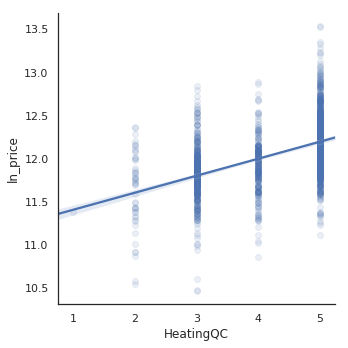

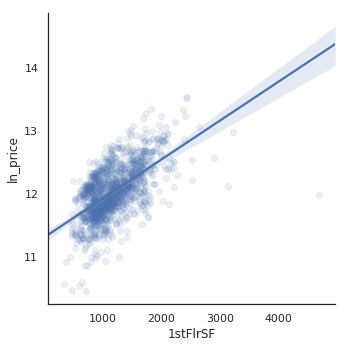

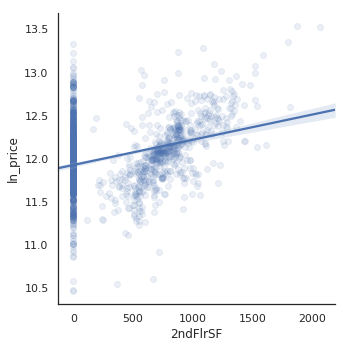

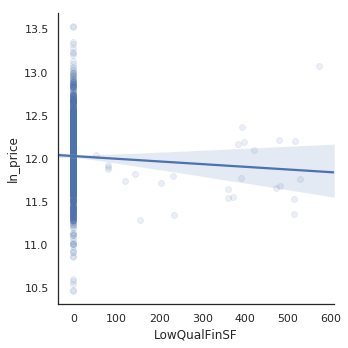

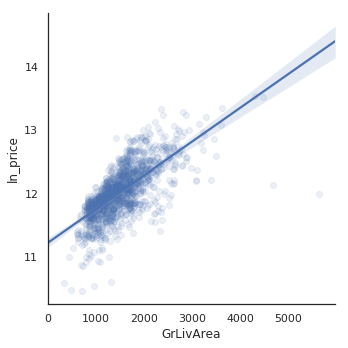

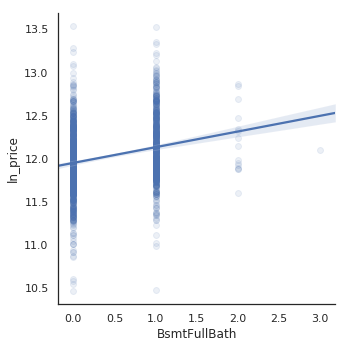

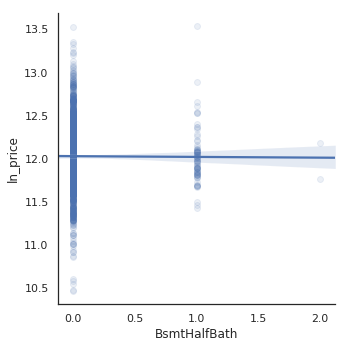

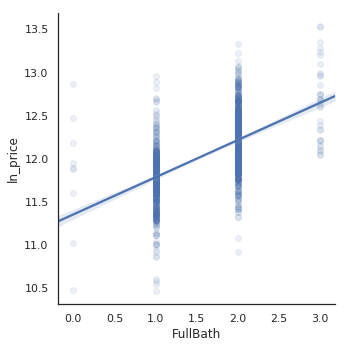

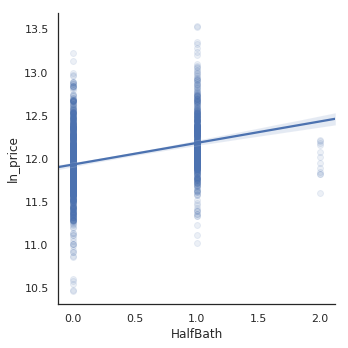

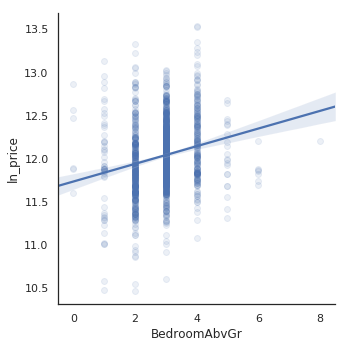

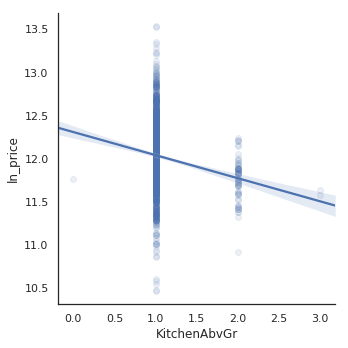

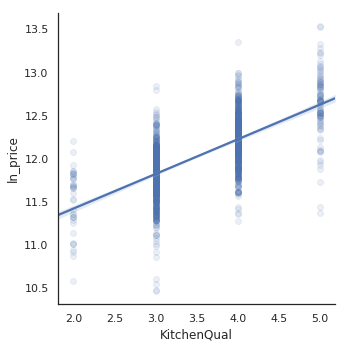

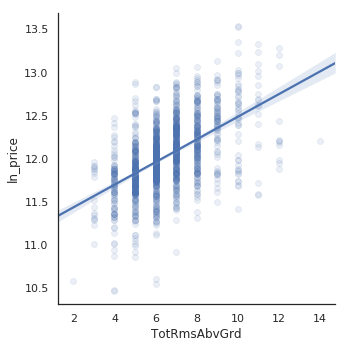

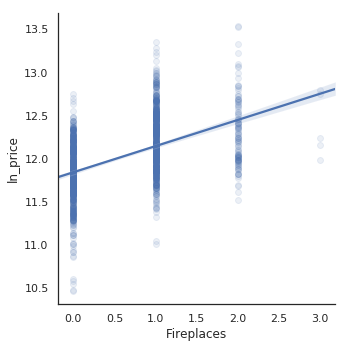

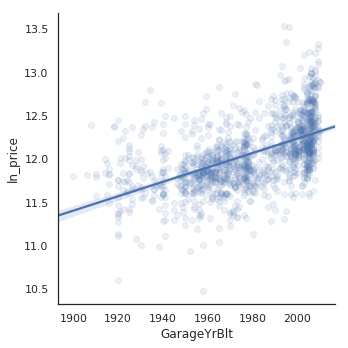

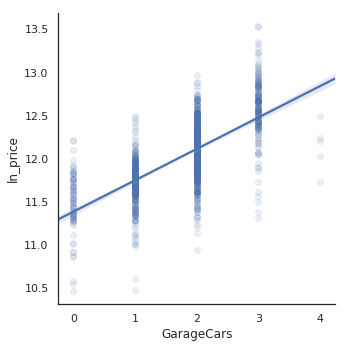

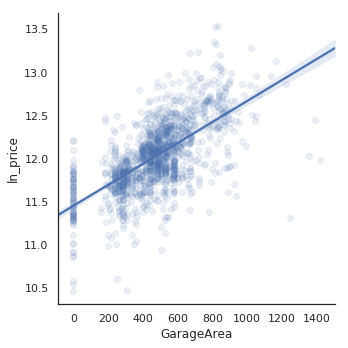

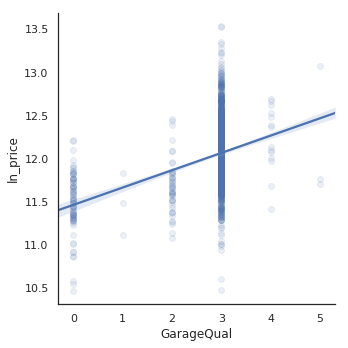

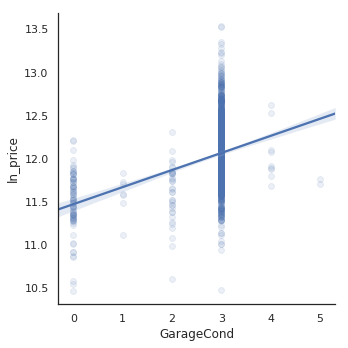

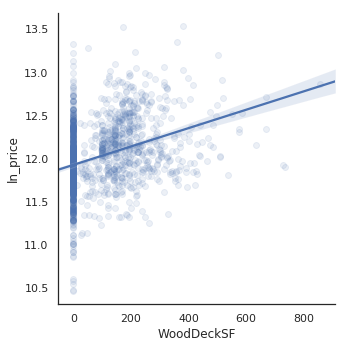

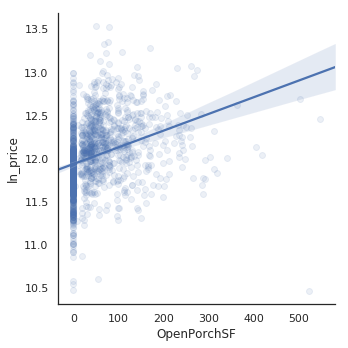

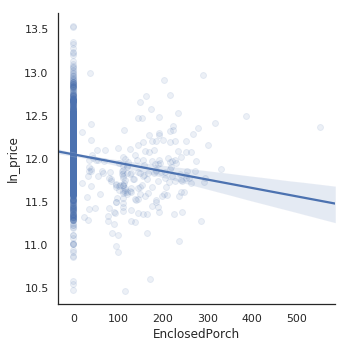

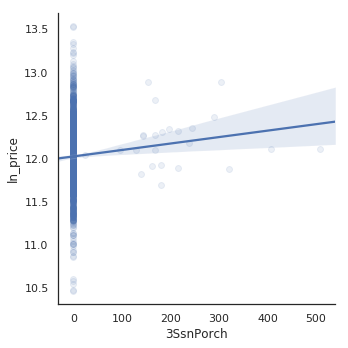

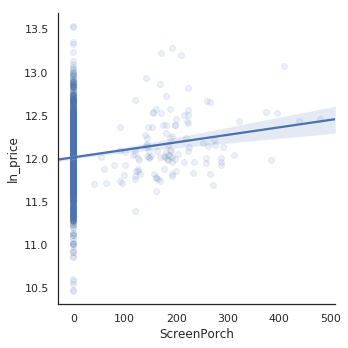

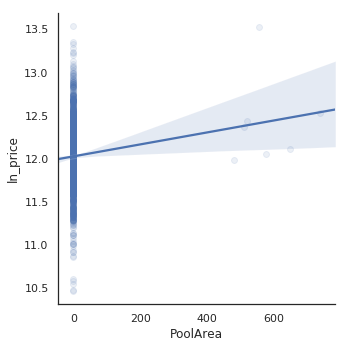

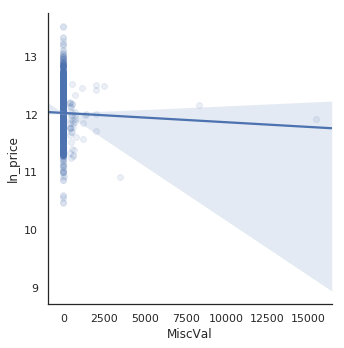

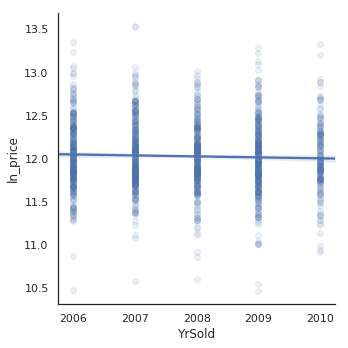

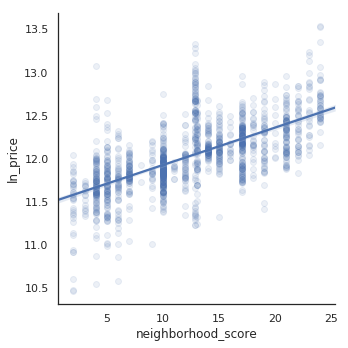

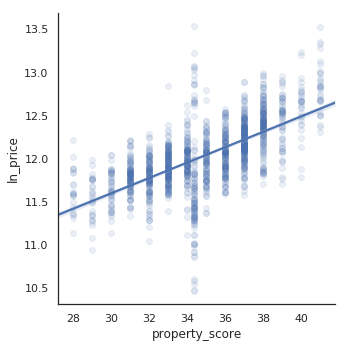

In [23]:
for feature in features:
    sns.lmplot(x=feature, y=target, data=df, scatter_kws=dict(alpha=0.1))
    plt.show()

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

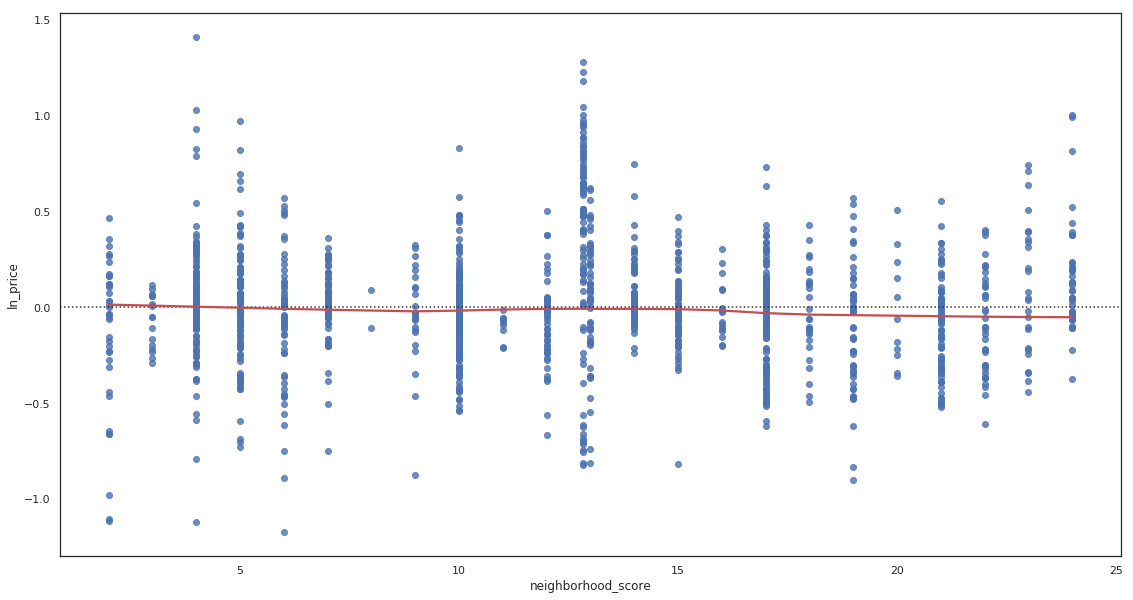

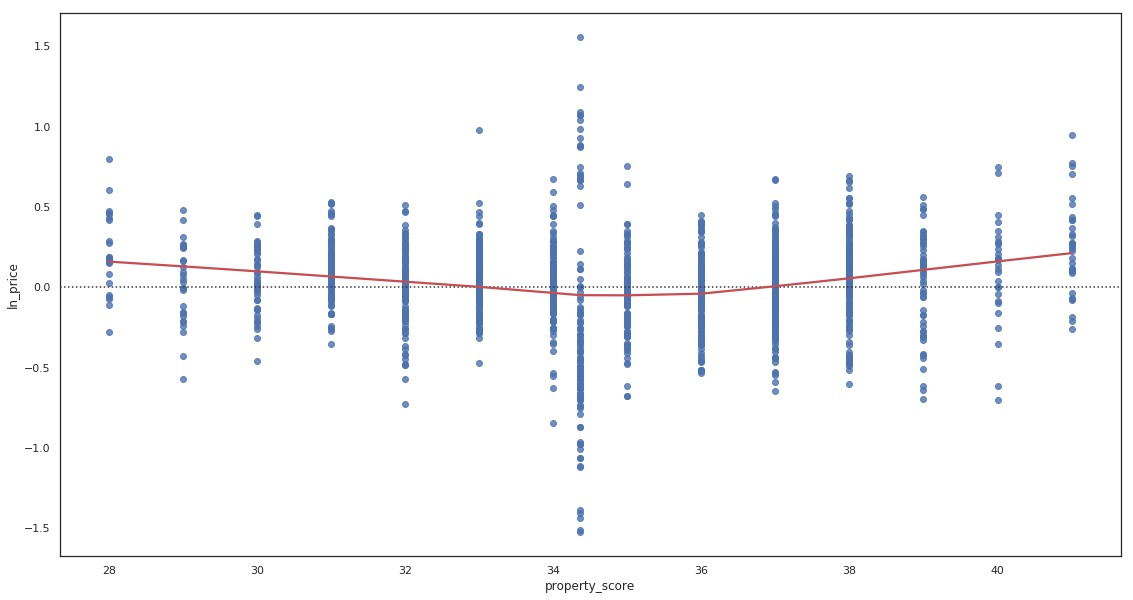

In [24]:
features = ['neighborhood_score', 'property_score']
for feature in features:
    sns.residplot(X[feature], y, lowess=True, line_kws=dict(color='r'))
    plt.show();

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
df['property_score'] = df['property_score']**2

In [0]:
# Prepare X and y
target = 'ln_price'
features = ['neighborhood_score', 'property_score']

X = df[features] 
y = df[target]

In [27]:
model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 3.876e+04
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        20:03:22   Log-Likelihood:                -2845.1
No. Observations:                1460   AIC:                             5694.
Df Residuals:                    1458   BIC:                             5705.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
neighborhood_score    -0.0232      0

# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other diagnostic tests. Can you show that residuals are normally distributed graphically?
- Write a blog post about inferential modeling using linear regression.